In [69]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import (DecisionTreeClassifier,
                          DecisionTreeRegressor,
                          plot_tree)
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             mean_absolute_error,
                             auc,
                             roc_curve)
from sklearn.metrics import r2_score

In [70]:
df = pd.read_csv(r"C:\Users\Artsiom\PycharmProjects\AIlabs\data_all\processed_data.csv")
df.head(10)

,id_number,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,0,19,27.900,0,True,16884.92400,False,False,False,True,True,False
1,1,18,33.770,1,False,1725.55230,False,False,True,False,False,True
2,2,28,33.000,3,False,4449.46200,False,False,True,False,False,True
3,3,33,22.705,0,False,21984.47061,False,True,False,False,False,True
4,4,32,28.880,0,False,3866.85520,False,True,False,False,False,True
5,5,31,25.740,0,False,3756.62160,False,False,True,False,True,False
6,6,46,33.440,1,False,8240.58960,False,False,True,False,True,False
7,7,37,27.740,3,False,7281.50560,False,True,False,False,True,False
8,8,37,29.830,2,False,6406.41070,True,False,False,False,False,True
9,9,60,25.840,0,False,28923.13692,False,True,False,False,True,False


In [71]:
#Regression

df["bmi_smoker"] = df["bmi"] * df["smoker"]
df["age2"] = df["age"] ** 2
df["obese"] = (df["bmi"] > 30).astype(int)
df["has_children"] = (df["children"] > 0).astype(int)

X_cols_1 = ["age", "age2", 'bmi', "obese", "smoker", "has_children",  'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'bmi_smoker']
y_col_1 = "charges"

print(df[y_col_1])

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Mean Square Error:  21418268.101367116
Root MSE:  4627.987478523156
Mean Absolute Error:  2554.7502714140783
R-squared:  0.8539241657199655


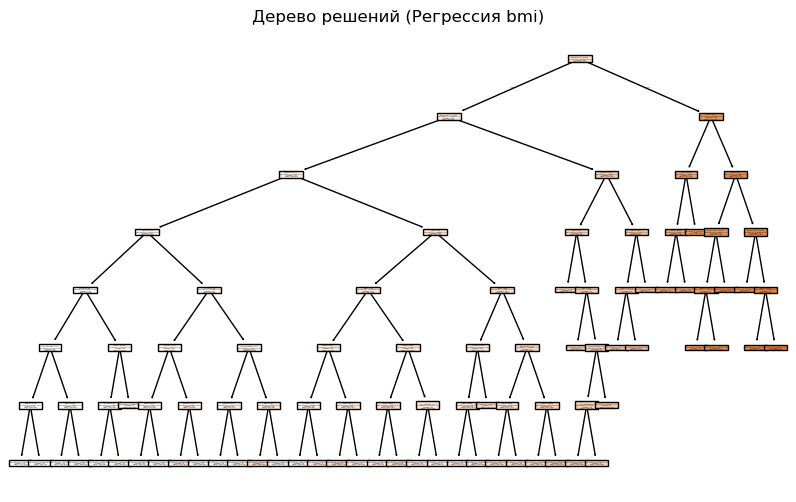

In [72]:
X_regression = df[X_cols_1]
y_regression = df[y_col_1]


X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_regression, y_regression, test_size = 0.3, random_state = 42)

regression_tree_model = DecisionTreeRegressor(
    max_depth=7,
    min_samples_split=20,
    min_samples_leaf=5,
    random_state=42)
regression_tree_model.fit(X_train_r, y_train_r)

y_predict_test_r = regression_tree_model.predict(X_test_r)

MSE = mean_squared_error(y_test_r, y_predict_test_r)
RMSE = root_mean_squared_error(y_test_r, y_predict_test_r)
MAE = mean_absolute_error(y_test_r, y_predict_test_r)

print('Mean Square Error: ', MSE)
print('Root MSE: ', RMSE)
print('Mean Absolute Error: ', MAE)

R2 = r2_score(y_test_r, y_predict_test_r)
print('R-squared: ', R2)

plt.figure(figsize = (10, 6))
plot_tree(regression_tree_model, filled = True, feature_names = X_regression.columns)
plt.title("Дерево решений (Регрессия bmi)")
plt.show()

In [73]:
X_cols_2 = ["age", "bmi", "children", "charges",
    "region_northeast", "region_northwest",
    "region_southeast", "region_southwest",
    "sex_female", "sex_male"
]
y_col_2 = "smoker"

X_classification = df[X_cols_2]
y_classification = df[y_col_2]

In [74]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_classification, y_classification, test_size = 0.3, random_state = 42)


In [75]:
classification_tree_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=10,
    random_state=42
)
classification_tree_model.fit(X_train_c, y_train_c)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [76]:
y_probability = classification_tree_model.predict_proba(X_test_c)[:, 1]
print(classification_tree_model.classes_)
fpr, tpr, thresholds = roc_curve(y_test_c, y_probability)
auc_metric = auc(fpr, tpr)

print("ROC-AUC metric: ", auc_metric)


[False  True]
ROC-AUC metric:  0.9860485166751577


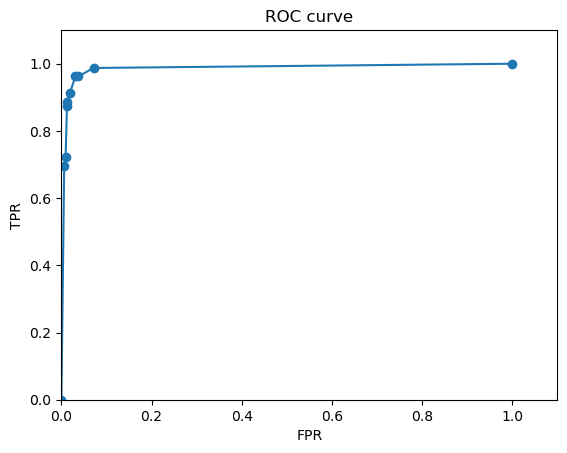

In [77]:
plt.plot(fpr, tpr, marker='o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')
plt.show()
